In [1]:
using Polyhedra
using GLPK
using JuMP
using Plots

In [2]:
#A = [1 1; 0 1] - [1; 1] * [1.17 1.03]
#A = [0.7776 -0.0227; 26.6185 -0.7776]
A = [0.7779 -0.0023; 26.4308 0.2812]
@show Wv = vrep([[x, y] for x in [-2, 2] for y in [-0.1, 0.1]])
lib = DefaultLibrary{Float64}(GLPK.Optimizer)
@show W = polyhedron(Wv, lib)
function Fs(s::Integer, verbose=1)
    @assert s ≥ 1
    F = W
    A_W = W
    for i in 1:(s-1)
        A_W = A * A_W
        F += A_W
        if verbose ≥ 1
            println("Number of points after adding A^$i * W: ", npoints(F))
        end
        removevredundancy!(F)
        if verbose ≥ 1
            println("Number of points after removing redundant ones: ", npoints(F))
        end
    end
    return F
end

Wv = vrep([[x, y] for x = [-2, 2] for y = [-0.1, 0.1]]) = convexhull([-2.0, -0.1], [-2.0, 0.1], [2.0, -0.1], [2.0, 0.1])
W = polyhedron(Wv, lib) = convexhull([-2.0, -0.1], [-2.0, 0.1], [2.0, -0.1], [2.0, 0.1])


Fs (generic function with 2 methods)

In [3]:
@time Fs(8)

Number of points after adding A^1 * W: 16
Number of points after removing redundant ones: 8
Number of points after adding A^2 * W: 32
Number of points after removing redundant ones: 12
Number of points after adding A^3 * W: 48
Number of points after removing redundant ones: 16
Number of points after adding A^4 * W: 64
Number of points after removing redundant ones: 20
Number of points after adding A^5 * W: 80
Number of points after removing redundant ones: 24
Number of points after adding A^6 * W: 96
Number of points after removing redundant ones: 28
Number of points after adding A^7 * W: 112
Number of points after removing redundant ones: 32
  3.521876 seconds (9.42 M allocations: 613.128 MiB, 5.30% gc time, 98.53% compilation time)


Polyhedron DefaultPolyhedron{Float64, Polyhedra.Intersection{Float64, Vector{Float64}, Int64}, Polyhedra.Hull{Float64, Vector{Float64}, Int64}}:
32-element iterator of Vector{Float64}:
 [-6.375728805438924, -227.57063367059507]
 [-6.376215991438925, -227.56697715059508]
 [-6.3766759914389235, -227.51073715059508]
 [-6.3766759914389235, -227.3107371505951]
 [-6.171074983558123, -210.73255550321596]
 [-5.827846521492609, -184.03846299888465]
 [-5.2629386902212225, -142.20657609432018]
 [-5.262866558810541, -142.20127889615526]
 [-4.350407590923962, -79.20388765807584]
 [-4.350291445342368, -79.19596668536268]
 [-2.9140649771063685, 9.83951233820535]
 [-2.9138829672166175, 9.850573169354485]
 [-0.7365326872166179, 121.82201428935448]
 [-0.7362585865464762, 121.83558516829031]
 [2.375341413453524, 227.5587851682903]
 [2.375728805438924, 227.57063367059507]
 [6.375728805438924, 227.57063367059507]
 [6.376215991438925, 227.56697715059508]
 [6.3766759914389235, 227.51073715059508]
 [6.3766759

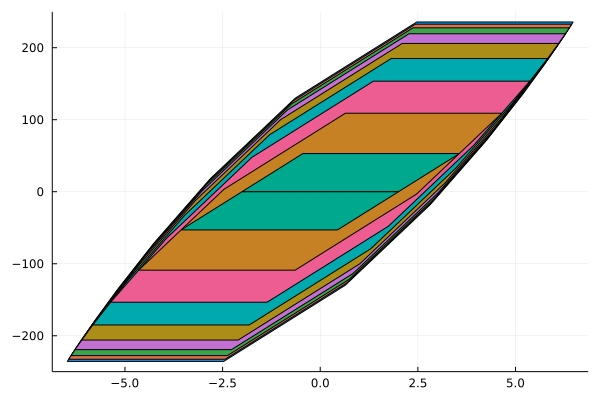

In [10]:
plot()
for i in 10:-1:1
    plot!(Fs(i, 0))
end
plot!()

In [11]:
function αo(s)
    A_W = A^s \ W
    hashyperplanes(A_W) && error("HyperPlanes not supported")
    return maximum([Polyhedra.support_function(h.a, W) / h.β for h in halfspaces(A_W)])
end
α = αo(1)

528.8972

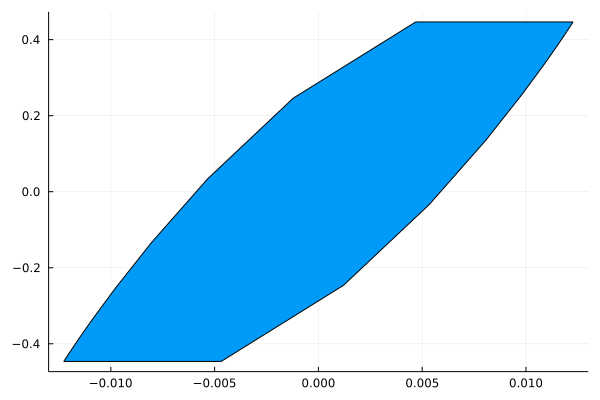

In [12]:
plot((1 - α)^(-1) * Fs(10, 0))